# **Arreglo Dataset**

In [1]:
!pip install matplotlib seaborn sklearn

In [2]:
#Importamos las librerías:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/content/total_merged_train.csv')
df = df.drop(columns=['customerid'] + ['systemloanid'])
y = df['good_bad_flag']
df.head()

,loannumber,loanamount,termdays,interest,loan_interval,interest_interval,good_bad_flag,avg_loanamount,avg_paym_span_hrs,avg_active_span_days,avg_interest,max_loannumber,bank_name_clients,age,age_interval,state
0,0-4,10000.0,30,3000.0,10000,3000,0,10000.000000,0.000000,33.000000,3000.000000,1.0,Multinational Banks,36.0,36-40,Lagos
1,0-4,10000.0,30,3000.0,10000,3000,1,10000.000000,13.000000,3.000000,3000.000000,1.0,GT Bank,41.0,41-61,Lagos
2,+4,20000.0,30,3000.0,mas de 10000,3000,1,15000.000000,15.166667,23.333333,3133.333333,6.0,Multinational Banks,34.0,26-35,Other
3,0-4,20000.0,30,4500.0,mas de 10000,mas de 3000,1,10000.000000,13.666667,25.333333,3000.000000,3.0,GT Bank,47.0,41-61,Other
4,+4,20000.0,30,4500.0,mas de 10000,mas de 3000,1,12727.272727,11.636364,14.000000,1559.090909,11.0,Multinational Banks,27.0,26-35,Other


## Tipología de variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loannumber            3361 non-null   object 
 1   loanamount            3361 non-null   float64
 2   termdays              3361 non-null   object 
 3   interest              3361 non-null   float64
 4   loan_interval         3361 non-null   object 
 5   interest_interval     3361 non-null   object 
 6   good_bad_flag         3361 non-null   int64  
 7   avg_loanamount        3361 non-null   float64
 8   avg_paym_span_hrs     3361 non-null   float64
 9   avg_active_span_days  3361 non-null   float64
 10  avg_interest          3361 non-null   float64
 11  max_loannumber        3361 non-null   float64
 12  bank_name_clients     3361 non-null   object 
 13  age                   3361 non-null   float64
 14  age_interval          3361 non-null   object 
 15  state                

In [5]:
categorical_vars = set(df.columns[df.dtypes == object])
numerical_vars = set(df.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)
print(categorical_vars)
print(numerical_vars)

['age_interval', 'bank_name_clients', 'loannumber', 'state', 'termdays', 'interest_interval', 'loan_interval']
['avg_paym_span_hrs', 'good_bad_flag', 'interest', 'avg_interest', 'avg_loanamount', 'avg_active_span_days', 'max_loannumber', 'loanamount', 'age']


## Transformación en Dummies

In [6]:
#Generamos dummies de las variables categóricas:
dummy_int = pd.get_dummies(df[['interest_interval']])
dummy_bank_name = pd.get_dummies(df[['bank_name_clients']], drop_first=True)
dummy_td = pd.get_dummies(df[['termdays']], drop_first=True)
dummy_age = pd.get_dummies(df[['age_interval']])
dummy_state = pd.get_dummies(df[['state']], drop_first=True)
dummy_loan = pd.get_dummies(df[['loan_interval']], drop_first=True)
dummy_loannum = pd.get_dummies(df[['loannumber']], drop_first=True)

#Añadimos las variables dummies y borramos las categóricas originales:
df = pd.concat([df, dummy_int, dummy_bank_name, dummy_td, dummy_age, dummy_state, dummy_loan, dummy_loannum], axis=1)
df = df.drop(['interest_interval','bank_name_clients', 'termdays', 'age_interval','state','loan_interval','loannumber'], 1)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


,loanamount,interest,good_bad_flag,avg_loanamount,avg_paym_span_hrs,avg_active_span_days,avg_interest,max_loannumber,age,interest_interval_3000,interest_interval_mas de 3000,interest_interval_menos de 3000,bank_name_clients_Multinational Banks,termdays_Other,age_interval_26-35,age_interval_36-40,age_interval_41-61,state_Other,loan_interval_mas de 10000,loannumber_0-4
0,10000.0,3000.0,0,10000.000000,0.000000,33.000000,3000.000000,1.0,36.0,1,0,0,1,0,0,1,0,0,0,1
1,10000.0,3000.0,1,10000.000000,13.000000,3.000000,3000.000000,1.0,41.0,1,0,0,0,0,0,0,1,0,0,1
2,20000.0,3000.0,1,15000.000000,15.166667,23.333333,3133.333333,6.0,34.0,1,0,0,1,0,1,0,0,1,1,0
3,20000.0,4500.0,1,10000.000000,13.666667,25.333333,3000.000000,3.0,47.0,0,1,0,0,0,0,0,1,1,1,1
4,20000.0,4500.0,1,12727.272727,11.636364,14.000000,1559.090909,11.0,27.0,0,1,0,1,0,1,0,0,1,1,0


# **Clustering**

## Elbow Method

In [7]:
distortions = []
K = range(1,10)
for k in K:
  kmeans_mod = KMeans(n_clusters = k)
  kmeans_mod.fit(df.drop(['good_bad_flag'],axis=1))
  distortions.append(kmeans_mod.inertia_)

Mostramos en pantalla y analizamos el **elbow plot**

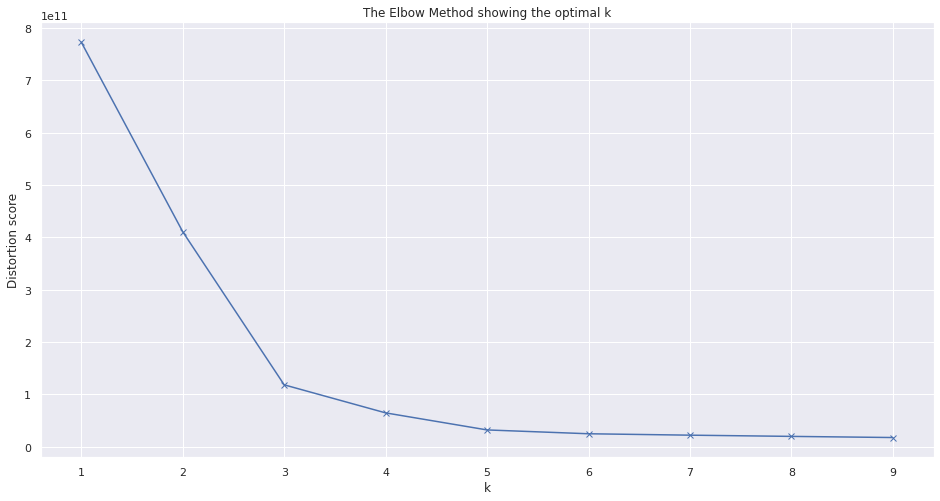

In [8]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## KMeans

In [9]:
clustering =  KMeans(n_clusters = 2, max_iter = 300).fit(df.drop(['good_bad_flag'],axis=1))
centroids = clustering.cluster_centers_
print(centroids)

[[1.25527756e+04 2.88782740e+03 1.07058401e+04 1.30710739e+01
  2.19745637e+01 2.49580450e+03 2.69624707e+00 5.90280688e+02
  5.01954652e-01 2.06802189e-01 2.91243159e-01 6.03987490e-01
  2.61532447e-01 3.63174355e-01 3.17435496e-01 3.19390149e-01
  5.21110242e-01 2.67396403e-01 7.34558249e-01]
 [3.49315068e+04 5.38119626e+03 1.99040634e+04 1.27040618e+01
  2.29056865e+01 3.46174674e+03 9.03860523e+00 6.24610212e+02
  1.74346202e-02 9.32752179e-01 4.98132005e-02 6.12702366e-01
  3.11332503e-01 3.44956413e-01 3.30012453e-01 3.25031133e-01
  5.65379826e-01 1.00000000e+00 7.47198007e-03]]


# **Shiloutte Score**

In [10]:
# Ajustamos el modelo para el rango de resultados y mostramos los resultados

range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(df.drop(['good_bad_flag'],axis=1))
    preds = clusterer.predict(df.drop(['good_bad_flag'],axis=1))
    centers = clusterer.cluster_centers_
    score = silhouette_score(df.drop(['good_bad_flag'],axis=1), preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7061177269403621)
For n_clusters = 3, silhouette score is 0.7251292515186358)
For n_clusters = 4, silhouette score is 0.6977901092232011)
For n_clusters = 5, silhouette score is 0.7471045094312349)
For n_clusters = 6, silhouette score is 0.75309517005674)
For n_clusters = 7, silhouette score is 0.744753741475826)
For n_clusters = 8, silhouette score is 0.7337367284313365)
For n_clusters = 9, silhouette score is 0.7331154796321206)


# **Agregamos al dataset original** 

In [11]:
df['cluster']=clustering.labels_
df.groupby('cluster').count()

,loanamount,interest,good_bad_flag,avg_loanamount,avg_paym_span_hrs,avg_active_span_days,avg_interest,max_loannumber,age,interest_interval_3000,interest_interval_mas de 3000,interest_interval_menos de 3000,bank_name_clients_Multinational Banks,termdays_Other,age_interval_26-35,age_interval_36-40,age_interval_41-61,state_Other,loan_interval_mas de 10000,loannumber_0-4
cluster,,,,,,,,,,,,,,,,,,,,
0,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558,2558
1,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803


In [12]:
df.to_csv('cluster_train.csv', index=False)

# **Visualización clusters**

In [13]:
from sklearn.decomposition import PCA 

pca = PCA (n_components=2)
pca_df_cluster = pca.fit_transform(df.drop(['good_bad_flag'],axis=1))
pca_df_cluster_2 = pd.DataFrame(data=pca_df_cluster, columns = ['Componente1', 'Componente2'])
pca_columna = pd.concat([pca_df_cluster_2, df[['cluster']]], axis=1)
pca_columna


,Componente1,Componente2,cluster
0,-8406.850983,-474.771705,0
1,-8406.799829,-469.771360,0
2,2685.724909,-591.196461,0
3,946.960314,-563.382705,0
4,1913.384774,-593.380785,0
...,...,...,...
3356,-8466.219478,-479.450929,0
3357,-8406.913397,-480.771437,0
3358,927.073171,-574.275402,0
3359,-857.638518,-555.307797,0


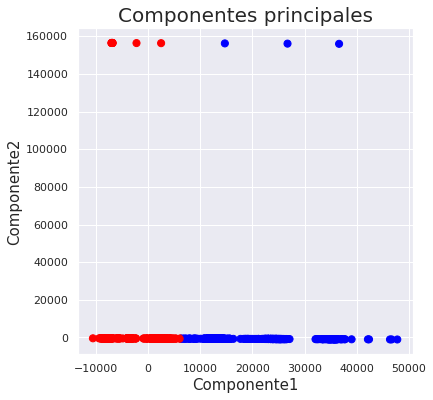

In [14]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente1', fontsize = 15)
ax.set_ylabel('Componente2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(["red", "blue", "black"])
ax.scatter(x = pca_columna.Componente1, y = pca_columna.Componente2,
          c=color_theme[pca_columna.cluster], s = 50)
plt.show()

# **Agregamos al test**

In [15]:
df = pd.read_csv("/content/total_merged_test.csv")

In [16]:
dummy_int = pd.get_dummies(df[['interest_interval']])
dummy_bank_name = pd.get_dummies(df[['bank_name_clients']], drop_first=True)
dummy_td = pd.get_dummies(df[['termdays']], drop_first=True)
dummy_age = pd.get_dummies(df[['age_interval']])
dummy_state = pd.get_dummies(df[['state']], drop_first=True)
dummy_loan = pd.get_dummies(df[['loan_interval']], drop_first=True)
dummy_loannum = pd.get_dummies(df[['loannumber']], drop_first=True)

df = pd.concat([df, dummy_int, dummy_bank_name, dummy_td, dummy_age, dummy_state, dummy_loan, dummy_loannum], axis=1)
df = df.drop(['interest_interval','bank_name_clients', 'termdays', 'age_interval','state','loan_interval','loannumber', 'systemloanid'], 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [17]:
test, id_column = df.drop(['customerid'],axis=1), df['customerid']
res = clustering.predict(test.drop(['good_bad_flag'],axis=1))
test['customerid'], test['cluster'] = id_column, res
test.groupby('cluster').count()

,loanamount,interest,good_bad_flag,avg_loanamount,avg_paym_span_hrs,avg_active_span_days,avg_interest,max_loannumber,age,interest_interval_3000,...,interest_interval_menos de 3000,bank_name_clients_Multinational Banks,termdays_Other,age_interval_26-35,age_interval_36-40,age_interval_41-61,state_Other,loan_interval_mas de 10000,loannumber_0-4,customerid
cluster,,,,,,,,,,,,,,,,,,,,,
0,653,653,653,653,653,653,653,653,653,653,...,653,653,653,653,653,653,653,653,653,653
1,187,187,187,187,187,187,187,187,187,187,...,187,187,187,187,187,187,187,187,187,187


In [18]:
test.to_csv("cluster_test.csv",index=False)